In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data crawl

Number of labels and their counts:
label
Other         816
Finance       725
Energy        113
Technology     83
Healthcare     47
Name: count, dtype: int64


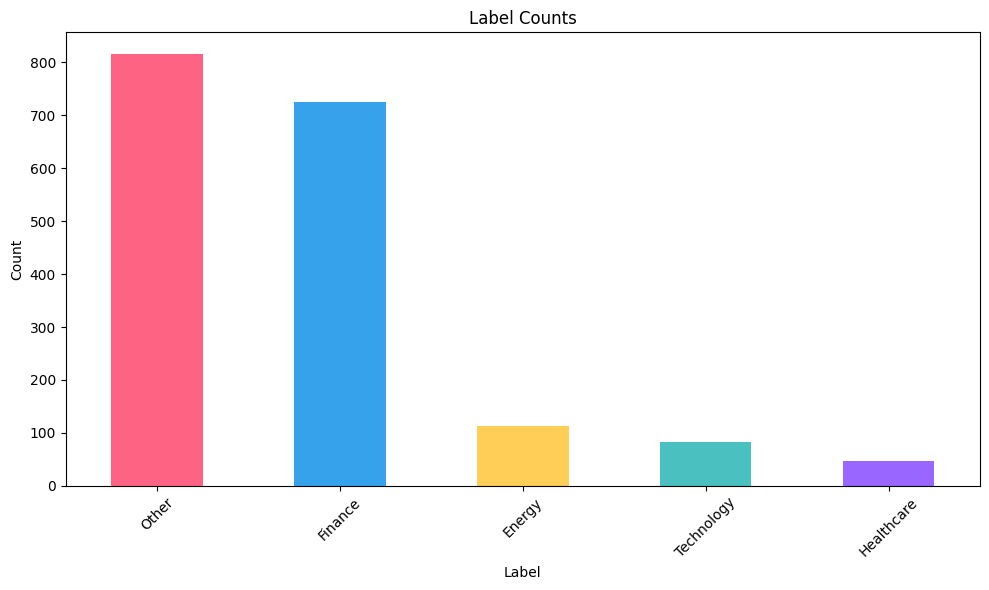

In [ ]:
# Step 2: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Load the Excel file from Google Drive
# Update the file path to match your Google Drive structure
file_path = '/content/drive/MyDrive/KLTN - 2025/Colab/title_raw (1).xlsx'
df = pd.read_excel(file_path)

# Step 4: Clean the data (remove rows where 'label' is NaN or empty)
df_cleaned = df.dropna(subset=['label'])  # Remove rows where 'label' is NaN
df_cleaned = df_cleaned[df_cleaned['label'].str.strip() != '']  # Remove rows where 'label' is empty string

# Step 5: Count the occurrences of each label
label_counts = df_cleaned['label'].value_counts()
print("Number of labels and their counts:")
print(label_counts)

# Step 6: Plot a bar chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF'])
plt.title('Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data public

In [ ]:
# Import thư viện cần thiết
import pandas as pd

# # Đặt tùy chọn hiển thị tất cả các hàng
# pd.set_option('display.max_rows', None)

# Đọc file CSV từ Google Drive
# Thay đường dẫn dưới đây bằng đường dẫn thực tế đến file CSV của bạn
file_path = '/content/drive/MyDrive/KLTN - 2025/KLTN/data/Original_news_dataset.csv'
df = pd.read_csv(file_path)

# Lấy cột 'topic' và loại bỏ giá trị NaN
topics = df['topic'].dropna()

# Đếm số lượng mỗi loại ngành
topic_counts = topics.value_counts()

# Hiển thị kết quả
print("Types and quantities:")
print(topic_counts)


Types and quantities:
topic
Thế giới                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

Number of articles by category:
cong nghe: 2752
kinh te: 4336
suc khoe: 5697
kinh doanh: 7389
tai chinh: 1133
tai chinh - kinh doanh: 934

Total number of articles across all categories: 22241


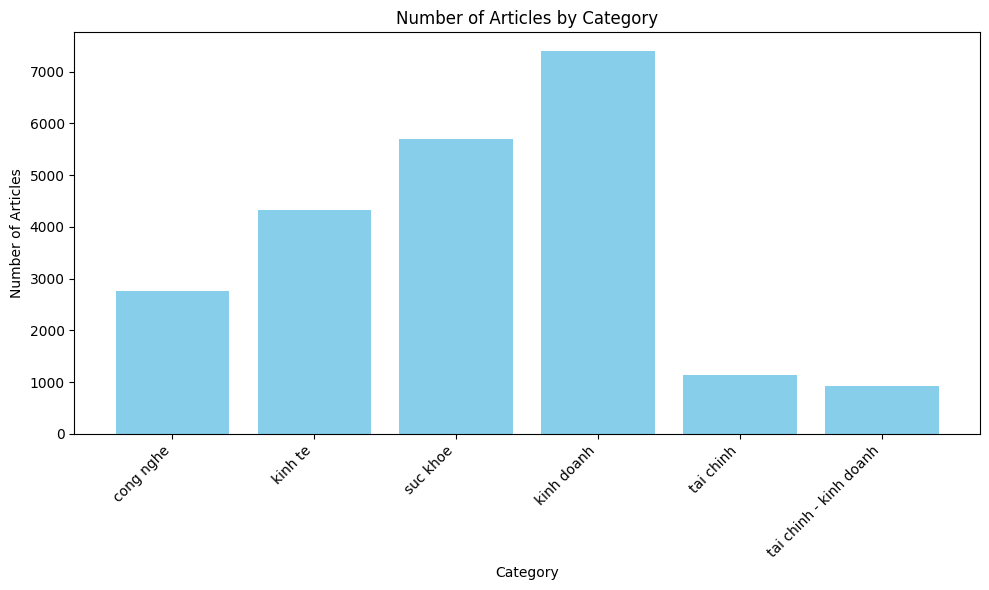

In [ ]:
# Import necessary libraries
import pandas as pd
import unidecode  # To remove Vietnamese diacritics
import matplotlib.pyplot as plt  # To create charts

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Read CSV file from Google Drive
file_path = '/content/drive/MyDrive/KLTN - 2025/KLTN/data/Original_news_dataset.csv'
df = pd.read_csv(file_path)

# List of categories to count (normalized to lowercase without diacritics)
categories = [
    'cong nghe', 'kinh te', 'suc khoe', 'kinh doanh',
    'tai chinh', 'tai chinh - kinh doanh'
]

# Function to normalize text (remove diacritics and convert to lowercase)
def normalize_text(text):
    if pd.isna(text):
        return ''
    return unidecode.unidecode(text.lower())

# Normalize the 'topic' column
df['topic_normalized'] = df['topic'].apply(normalize_text)

# Count the number of articles for each category based on keyword presence
counts = {}
for category in categories:
    counts[category] = df[df['topic_normalized'].str.contains(category, na=False)].shape[0]

# Display results
print("Number of articles by category:")
for category, count in counts.items():
    print(f"{category}: {count}")

# Calculate and display the total number of articles
total_articles = sum(counts.values())
print(f"\nTotal number of articles across all categories: {total_articles}")

# Create a bar chart
plt.figure(figsize=(10, 6))  # Chart size
plt.bar(counts.keys(), counts.values(), color='skyblue')  # Create bar chart
plt.xlabel('Category')  # X-axis label
plt.ylabel('Number of Articles')  # Y-axis label
plt.title('Number of Articles by Category')  # Title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display chart


Available sheets: ['Version1_full', 'raw', 'Merge_raw', 'Link báo', 'bản summary lỗi', 'chungta_fpt', 'Healthcare', 'Energy']
Number of industries and their counts in Version1_full:
industry
Finance       1334
Energy        1225
Other         1122
Technology     879
Healthcare     619
Name: count, dtype: int64


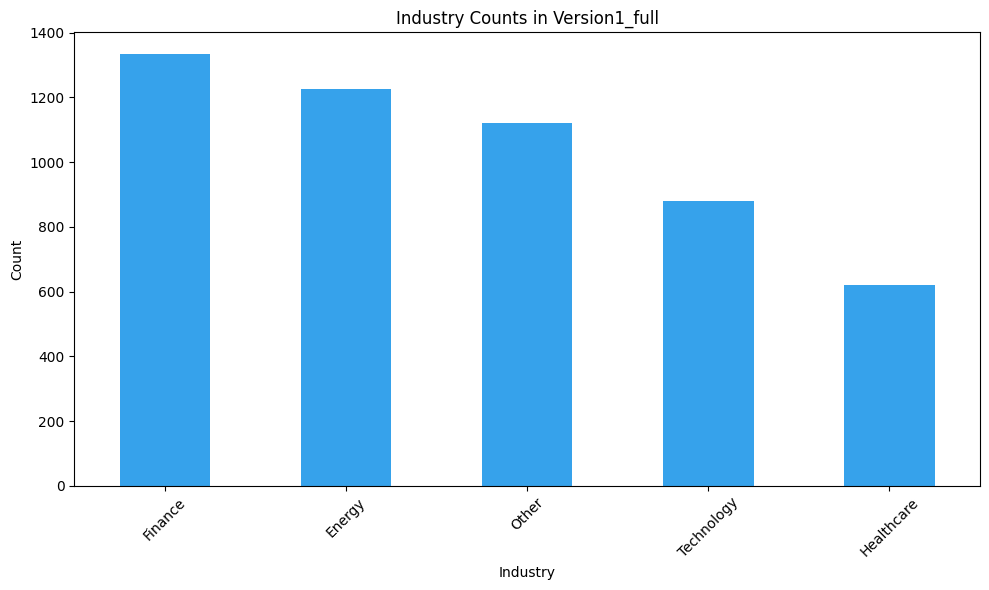

In [ ]:
# Step 2: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Load the Excel file and get all sheet names
file_path = '/content/drive/MyDrive/KLTN_2025/KLTN/data/data_news.xlsx'  # Đảm bảo file đã được tải lên
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names
print("Available sheets:", sheet_names)

# Step 4: Process each sheet (example: select a specific sheet or loop through all)
# Option 1: Process a specific sheet (e.g., the first sheet)
selected_sheet = 'Version1_full'  # Chọn sheet đầu tiên, bạn có thể thay bằng tên sheet cụ thể
df = pd.read_excel(file_path, sheet_name=selected_sheet)

# Option 2: Process all sheets (uncomment to use)
"""
all_dfs = {}
for sheet in sheet_names:
    all_dfs[sheet] = pd.read_excel(file_path, sheet_name=sheet)
    print(f"Processing sheet: {sheet}")
    # Clean and analyze each sheet here if needed
"""

# Step 5: Clean the data (remove rows where 'industry' is NaN or empty)
df_cleaned = df.dropna(subset=['industry'])  # Remove rows where 'industry' is NaN
df_cleaned = df_cleaned[df_cleaned['industry'].str.strip() != '']  # Remove rows where 'industry' is empty string

# Step 6: Count the occurrences of each industry
industry_counts = df_cleaned['industry'].value_counts()
print("Number of industries and their counts in", selected_sheet + ":")
print(industry_counts)

# Step 7: Plot a bar chart
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color=['#36A2EB'])
plt.title(f'Industry Counts in {selected_sheet}')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Available sheets: ['Version1_full', 'raw', 'Merge_raw', 'Link báo', 'bản summary lỗi', 'chungta_fpt', 'Healthcare', 'Energy']
Number of sentiments and their counts in Version1_full:
sentiment
Positive    2615
Neutral     1320
Negative    1243
Name: count, dtype: int64


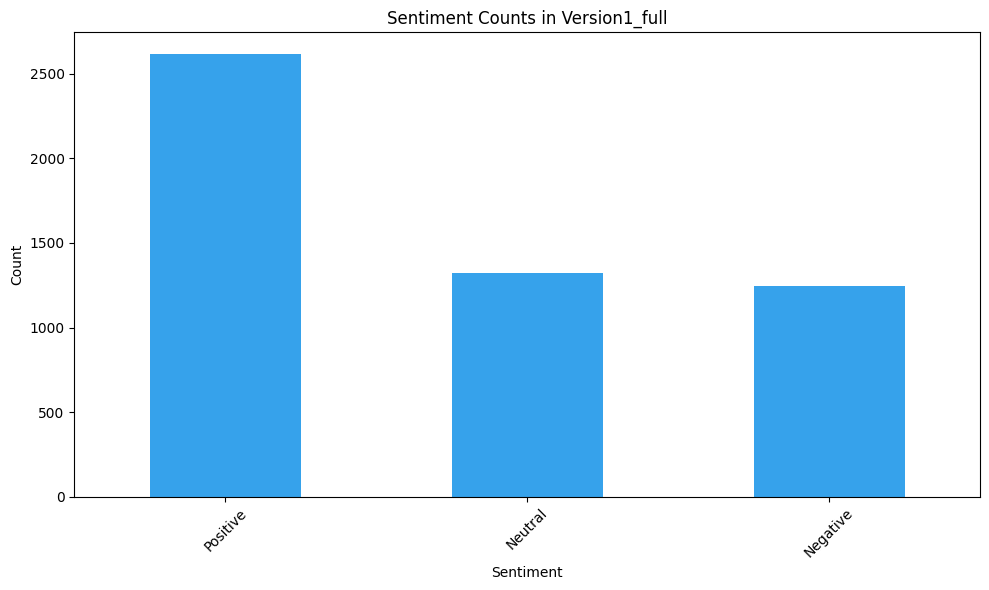

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/KLTN_2025/KLTN/data/data_news.xlsx'
excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names
print("Available sheets:", sheet_names)

selected_sheet = 'Version1_full'
df = pd.read_excel(file_path, sheet_name=selected_sheet)

df_cleaned = df.dropna(subset=['sentiment'])
df_cleaned = df_cleaned[df_cleaned['sentiment'].str.strip() != '']

sentiment_counts = df_cleaned['sentiment'].value_counts()
print("Number of sentiments and their counts in", selected_sheet + ":")
print(sentiment_counts)

plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=['#36A2EB'])
plt.title(f'Sentiment Counts in {selected_sheet}')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#**Statistics of the number of tokens**

Tổng số token (PhoBERT): 723447
Số token trung bình (PhoBERT): 139.69
Số token tối đa (PhoBERT): 269
Số token tối thiểu (PhoBERT): 48


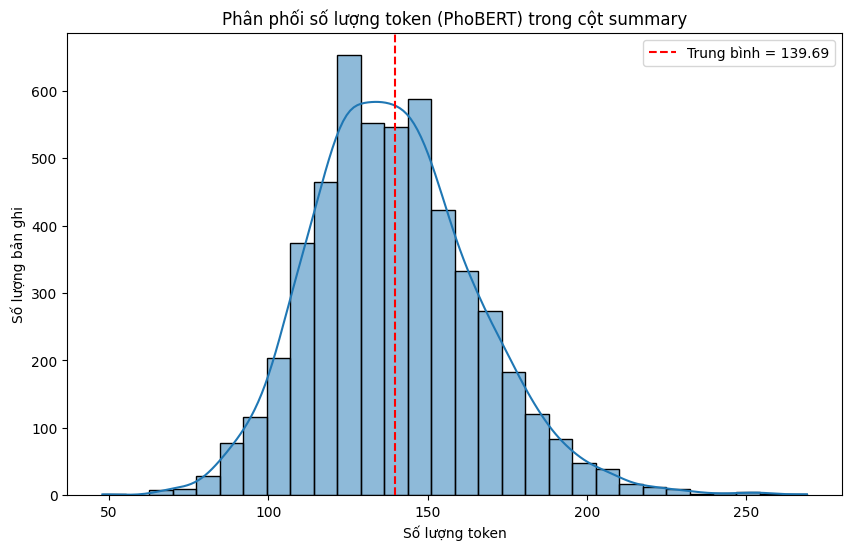

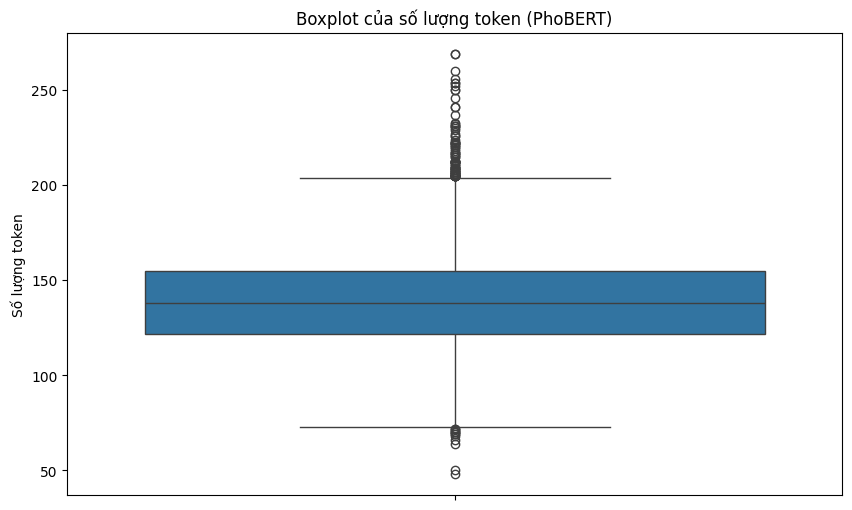

Kết quả đã được lưu vào 'phobert_token_v1.csv'.
Nhập đoạn text để phân tích token (PhoBERT): Dự luật sửa đổi Luật Các tổ chức tín dụng đề xuất chuyển quyền quyết định cho vay đặc biệt 0% từ Thủ tướng sang Ngân hàng Nhà nước (NHNN) để rút ngắn thời gian xử lý, đảm bảo an toàn hệ thống. NHNN được quyền cho vay các tổ chức tín dụng gặp khó khăn về thanh khoản hoặc thực hiện tái cơ cấu. Dự luật cũng trao quyền thu giữ tài sản bảo đảm cho tổ chức tín dụng/công ty quản lý nợ khi có thỏa thuận trong hợp đồng và tuân thủ pháp luật, đạo đức xã hội. Uỷ ban Kinh tế và Tài chính Quốc hội cơ bản tán thành nhưng yêu cầu rà soát quy định, làm rõ tiêu chí, thủ tục cho vay đặc biệt và vai trò của chính quyền địa phương trong thu giữ tài sản. Quốc hội sẽ thảo luận và biểu quyết thông qua dự luật vào tháng 6.

=== Phân tích token cho đoạn text ===
Đoạn text đầu vào: 'Dự luật sửa đổi Luật Các tổ chức tín dụng đề xuất chuyển quyền quyết định cho vay đặc biệt 0% từ Thủ tướng sang Ngân hàng Nhà nước (NHNN) đ

In [2]:
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Tải tokenizer của PhoBERT (dùng model 'vinai/phobert-base')
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base')

# Tải dữ liệu (giả sử file là 'data.xlsx' hoặc 'data.csv')
file_path = '/content/drive/MyDrive/KLTN_2025/KLTN/models/checkpoint_sentiment_classify/Train_summary/Data_summary_sentiment.xlsx'  # Thay đổi đường dẫn nếu cần
if os.path.exists(file_path):
    if file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        df = pd.read_csv(file_path)
else:
    print("File không tồn tại. Vui lòng kiểm tra đường dẫn hoặc tải file lên.")
    exit()

if 'summary' not in df.columns:
    print("Cột 'summary' không tồn tại. Vui lòng kiểm tra tên cột trong file.")
    exit()

# Hàm tính số token bằng tokenizer của PhoBERT
def count_phobert_tokens(text):
    if pd.isna(text):  # Xử lý giá trị NaN
        return 0
    tokens = tokenizer.tokenize(text)
    return len(tokens)

# Thêm cột mới chứa số token từ PhoBERT
df['phobert_token_count'] = df['summary'].apply(count_phobert_tokens)

# Thống kê cơ bản
total_tokens = df['phobert_token_count'].sum()
avg_tokens = df['phobert_token_count'].mean()
max_tokens = df['phobert_token_count'].max()
min_tokens = df['phobert_token_count'].min()

print(f"Tổng số token (PhoBERT): {total_tokens}")
print(f"Số token trung bình (PhoBERT): {avg_tokens:.2f}")
print(f"Số token tối đa (PhoBERT): {max_tokens}")
print(f"Số token tối thiểu (PhoBERT): {min_tokens}")

# Trực quan hóa
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='phobert_token_count', bins=30, kde=True)
plt.title('Phân phối số lượng token (PhoBERT) trong cột summary')
plt.xlabel('Số lượng token')
plt.ylabel('Số lượng bản ghi')
plt.axvline(avg_tokens, color='r', linestyle='--', label=f'Trung bình = {avg_tokens:.2f}')
plt.legend()
plt.show()

# Biểu đồ boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='phobert_token_count')
plt.title('Boxplot của số lượng token (PhoBERT)')
plt.ylabel('Số lượng token')
plt.show()

# Lưu kết quả
df.to_csv('phobert_token_v1.csv', index=False)
print("Kết quả đã được lưu vào 'phobert_token_v1.csv'.")

# Thêm chức năng phân tích một đoạn text mới
input_text = input("Nhập đoạn text để phân tích token (PhoBERT): ")

# Tính token và in chi tiết quá trình
print("\n=== Phân tích token cho đoạn text ===")
tokens = tokenizer.tokenize(input_text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
final_token_count = len(tokens)

print(f"Đoạn text đầu vào: '{input_text}'")
print(f"Bước 1: Tokenizer chia đoạn text thành các token:")
for i, token in enumerate(tokens, 1):
    print(f"Token {i}: {token}")
print(f"Bước 2: Chuyển token thành ID (dựa trên từ điển của PhoBERT):")
for i, token_id in enumerate(token_ids, 1):
    print(f"Token {i} ID: {token_id}")
print(f"Kết quả cuối cùng: Số lượng token = {final_token_count}")

# (Tùy chọn) Thêm token đặc biệt [CLS] và [SEP] như khi dùng trong mô hình
tokens_with_special = [tokenizer.cls_token] + tokens + [tokenizer.sep_token]
token_ids_with_special = tokenizer.convert_tokens_to_ids(tokens_with_special)
print(f"\nVới token đặc biệt [CLS] và [SEP] (dùng trong mô hình):")
print(f"Token: {tokens_with_special}")
print(f"Token IDs: {token_ids_with_special}")
print(f"Số lượng token (bao gồm [CLS] và [SEP]): {len(tokens_with_special)}")